Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

In [86]:
import pandas as pd

In [335]:
data_path = ('Desktop/Thinkful/amazon_cells_labelled.txt')
amz_0 = pd.read_csv(data_path, delimiter= '\t', header=None)

#Score is either 1 (for positive) or 0 (for negative)
amz_0.columns = ['review', 'score']

In [336]:
amz_0.head(2)

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [337]:
amz_0['review'] = amz_0['review'].apply(lambda x: x.lower()
           .replace(",", "").replace(".", "").replace("!", "").replace("?", "")
           .replace(";", "").replace(":", "").replace("*", "")
           .replace("(", "").replace(")", "")
           .replace("/", ""))

In [338]:
amz_0.head()

,review,score
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1


In [339]:
amz = amz_0.copy()

In [340]:
#The words chosen below are simply intuited as possibly having something to point on 1 (for positive)
keywords_good = ['good', 'great', 'expected', 'recommend', 'happy', 'excellent',
                 'wow', 'fast', 'recommended', 'love', 'nice', 'amazing', 'teriffic', 'surprized']

for key in keywords_good:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amz[str(key)] = amz.review.str.contains((' ' + str(key) + ' '), case=False)
    amz[str(key)] = amz.review.str.contains((str(key) + ' '), case=False)
    amz[str(key)] = amz.review.str.contains((' ' + str(key)), case=False)
    amz[str(key)] = amz.review.str.contains((str(key)), case=False)

In [300]:
amz['allcaps'] = amz.review.str.isupper()

In [301]:
amz

,review,score,good,great,expected,recommend,happy,excellent,wow,fast,allcaps,recommended,love,nice,amazing,teriffic,surprized
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,good case excellent value,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,great for the jawbone,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,i have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,if you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,if you are razr owneryou must have this,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,needless to say i wasted my money,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,what a waste of money and time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [302]:
amz['score'] = (amz['score'] == 1)

In [303]:
amz

,review,score,good,great,expected,recommend,happy,excellent,wow,fast,allcaps,recommended,love,nice,amazing,teriffic,surprized
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,good case excellent value,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,great for the jawbone,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,i have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,if you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,if you are razr owneryou must have this,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,needless to say i wasted my money,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,what a waste of money and time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [304]:
import seaborn as sns

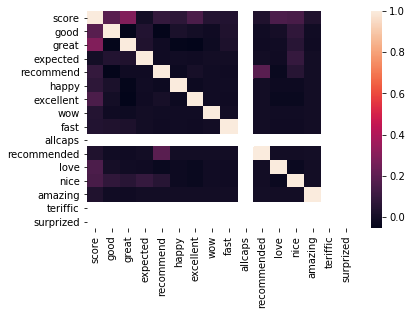

In [305]:
sns.heatmap(amz.corr())

In [306]:
data = amz[keywords_good + ['allcaps']]
target = amz['score']

In [307]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 291


In [308]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[468,  32],
       [259, 241]])

In [309]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(y_pred)): 
        if target[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and target[i]!=y_pred[i]:
           FP += 1
        if target[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and target[i]!=y_pred[i]:
           FN += 1

In [310]:
#Sensitivity - positive correctly identified:
target_pos = 0
for i in range(len(target)): 
        if target[i]== 1:
           target_pos += 1
print('Sensitivity is: {}'.format(100*TP/target_pos)) 


Sensitivity is: 48.2


In [311]:
print('accuracy is: {}'.format((TN+TP)*100/(TP+TN+FP+FN)))

accuracy is: 70.9


In [312]:
#Specificity - negatives correctly identified
target_neg = 0
for i in range(len(target)): 
        if target[i]== 0:
           target_neg += 1
print('Specificity is: {}'.format(100*TN/target_neg)) 

Specificity is: 93.6


## Holdout Groups

In [283]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.675
Testing on Sample: 0.676


## Cross Validation

In [284]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.72, 0.7 , 0.72, 0.67, 0.67, 0.68, 0.61, 0.62, 0.71, 0.62])

# Negative Review word counts
bad_words_freq = Counter()
for value in amz[amz['score'] == 0]['review']:
    bad_words_freq.update(value.split())

## Now will try to identifying Negatives Instead of Positives

In [341]:
amz_n = amz_0.copy()
keywords_bad = ['bad', 'terrible', 'dissapointed', 'worse', 'worst', 'sad', 'broken', 
                'damaged', 'defective', 'slow', 'problems', 'wasted',
 'hate', 'unacceptible']

for i in keywords_bad:
    amz_n[str(i)] = amz_n.review.str.contains((' ' + str(i) + ' '), case=False)
    amz_n[str(i)] = amz_n.review.str.contains((str(i) + ' '), case=False)
    amz_n[str(i)] = amz_n.review.str.contains((' ' + str(i)), case=False)
    amz_n[str(i)] = amz_n.review.str.contains((str(i)), case=False)

In [342]:
amz_n['score'] = (amz_n['score'] == 0)

In [343]:
amz_n

,review,score,bad,terrible,dissapointed,worse,worst,sad,broken,damaged,defective,slow,problems,wasted,hate,unacceptible
0,so there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,good case excellent value,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,the mic is great,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,i have to jiggle the plug to get it to line up...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,if you have several dozen or several hundred c...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,if you are razr owneryou must have this,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,needless to say i wasted my money,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,what a waste of money and time,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


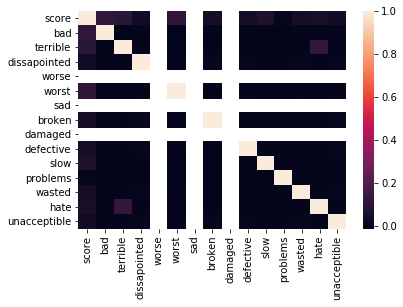

In [344]:
sns.heatmap(amz_n.corr())

In [345]:
data_n = amz_n[keywords_bad]
target_n = amz_n['score']

In [346]:
# Instantiate our model and store it in a new variable.
bnb_n = BernoulliNB()
# Fit our model to the data.
bnb_n.fit(data_n, target_n)
# Classify, storing the result in a new variable.
y_pred_n = bnb_n.predict(data_n)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_n.shape[0],
    (target_n != y_pred_n).sum()
))

Number of mislabeled points out of a total 1000 points : 448


In [347]:
confusion_matrix(target_n, y_pred_n)

array([[499,   1],
       [447,  53]])

In [354]:
TP_n = 0
FP_n = 0
TN_n = 0
FN_n = 0
for i in range(len(y_pred_n)): 
        if target_n[i]==y_pred_n[i]==0:
           TP_n += 1
        if y_pred_n[i]==1 and target_n[i]!=y_pred_n[i]:
           FP_n += 1
        if target_n[i]==y_pred_n[i]==1:
           TN_n += 1
        if y_pred_n[i]==0 and target_n[i]!=y_pred_n[i]:
           FN_n += 1

In [364]:
#Sensitivity - positive correctly identified:
target_pos_n = 0
for i in range(len(target_n)): 
        if target_n[i]== 1:
           target_pos_n += 1
print('Sensitivity is: {}'.format(100*TP_n/target_pos_n)) 

Sensitivity is: 99.8


In [362]:
#print('accuracy is: {}'.format((TN_n+TP_n)*100/(TP_n+TN_n+FP_n+FN_n)))
print("Accuracy : {}%".format( bnb_n.score(data_n, target_n) * 100 ))

accuracy is: 55.2
Accuracy : 55.2%


In [368]:
#Specificity - negatives correctly identified
#Score is either 1 (for positive) or 0 (for negative)
target_neg_n = 0
for i in range(len(target_n)): 
        if target_n[i]== 1:
           target_neg_n += 1
print('Specificity is: {}'.format(100*TN_n/target_neg_n)) 


Specificity is: 10.6


In [358]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_n, target_n, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb_n.fit(X_train_n, y_train_n).score(X_test_n, y_test_n)))
print('Testing on Sample: ' + str(bnb_n.fit(data_n, target_n).score(data_n, target_n)))

With 20% Holdout: 0.58
Testing on Sample: 0.552


In [359]:
cross_val_score(bnb_n, data_n, target_n, cv=10)

array([0.53, 0.55, 0.56, 0.57, 0.55, 0.53, 0.58, 0.5 , 0.58, 0.51])

## Conclusion

I was able to get about 70% accuracy (good keywords) and 50% accuracy (bad keywords).


First model: 
259 errors are from failing to identify a bad review (False negative - Type II Error)

32 errors are from incorrectly identifying a good review (False positive - Type I Error)

Second model: 
447 errors are from failing to identify a bad review (False negative - Type II Error)

1 errors are from incorrectly identifying a good review (False positive - Type I Error)

The second model is more overfit. Probably because some of the keywords appear in both positive and negative sense. 